# Scikit-Learn 教學

In [1]:
%pip install --upgrade scikit-learn==0.23.0

Requirement already up-to-date: scikit-learn==0.23.0 in /usr/local/lib/python3.7/dist-packages (0.23.0)


In [2]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV #CV : Cross Validator
import matplotlib.pylab as plt
import pandas as pd

In [3]:
X, y = load_boston(return_X_y=True)

mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
                 ('scale', StandardScaler()),
                 ('model', KNeighborsRegressor(n_neighbors=1))
])
#pipe.get_params()

In [4]:
mod = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             cv=3)

In [5]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002324,0.000960,0.002215,0.000075,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001302,0.000055,0.002128,0.000092,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001230,0.000011,0.001902,0.000101,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001321,0.000086,0.002271,0.000259,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001225,0.000018,0.002711,0.001067,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.003106,0.000499,0.004181,0.001468,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001272,0.000008,0.002155,0.000117,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001225,0.000002,0.002176,0.000160,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001384,0.000170,0.002528,0.000566,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.002010,0.000507,0.003127,0.000569,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [6]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 台中市南區

## 抓csv 載入DataFrame

In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
!wget https://linebot4106029040.herokuapp.com/getfile/B-B03-%E8%87%BA%E4%B8%AD%E5%B8%82%E5%8D%97%E5%8D%80.csv

--2021-06-14 08:31:48--  https://linebot4106029040.herokuapp.com/getfile/B-B03-%E8%87%BA%E4%B8%AD%E5%B8%82%E5%8D%97%E5%8D%80.csv
Resolving linebot4106029040.herokuapp.com (linebot4106029040.herokuapp.com)... 54.165.58.209, 54.159.116.102, 52.5.82.174, ...
Connecting to linebot4106029040.herokuapp.com (linebot4106029040.herokuapp.com)|54.165.58.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5937473 (5.7M) [text/csv]
Saving to: ‘B-B03-臺中市南區.csv.2’

B-B03-臺中市南區.cs 100%[===================>]   5.66M  27.3MB/s    in 0.2s    

2021-06-14 08:31:49 (27.3 MB/s) - ‘B-B03-臺中市南區.csv.2’ saved [5937473/5937473]



In [9]:
#!wget https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTC/NotoSansCJK-Black.ttc

In [10]:
# from matplotlib.font_manager import FontProperties
# myfont = FontProperties(fname=r'./NotoSansCJK-Black.ttc')

In [11]:
df = pd.read_csv('B-B03-臺中市南區.csv')

## 檢視欄位完整度

**原有欄位**:

[x] 用途(AA11)-> 只留「住」	
[o] 地址門牌(a)	
[o] 建物類型(b)	
[o] 主建物占總面積比例(bs)	
[o] 交易年月(e)	
[o] 有無電梯(el)	
[x] 交易樓層/總樓層(f) -> 只取出總樓層tf	
[o] unknown(fi)	
[o] 屋齡(g)	
[?] 土地筆數(j)	
[?] 建物筆數(k)	
[?] 車位筆數(l)	
[o] 緯度(lat)	
[o] 經度(lon)	
[o] 管委會(m)	
[?] 每坪單價(p)	
[o] unknown(r)	
[o] 總坪數(s)	
[?] 類型(t)	
[o] 交易總價(tp)	
[o] 格局(v)

**外加欄位**	
[o] 建物總樓層(tf)

In [12]:
#欄位資料完整度
pd.DataFrame(1 - df.isnull().mean(), columns={'完整度'})

,完整度
AA11,0.995147
AA12,0.000000
a,1.000000
b,1.000000
bs,0.832199
city,1.000000
cp,0.200871
e,1.000000
el,1.000000
es,0.337252


In [13]:
df.head(2)

,AA11,AA12,a,b,bs,city,cp,e,el,es,f,fi,g,id,j,k,l,lat,lon,m,p,pimg,r,s,sq,t,tp,type,v,district_code
0,其他,NaN,南和路151~180號,住宅大樓(11層含以上有電梯),NaN,B,NaN,11003,有,NaN,九層/十五層,NaN,7.0,0,1,1,1,24.114653,120.667948,有,"270,916",bt_05.png,61,49.83,We1qR8SXCmZ/4wHtZoXZvcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,"1,350",Biz,3房2廳2衛有隔間,B03
1,其他,NaN,學府路146巷1~30號,住宅大樓(11層含以上有電梯),55.80%,B,NaN,11003,有,NaN,十五層/二十一層,NaN,25.0,1,1,1,0,24.129161,120.674391,有,"170,631",bt_05.png,50,11.14,HSVzMNXKca8od+IMhcfupcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),190,Biz,1房0廳1衛有隔間,B03


In [14]:
#丟掉完整度低 / 不相關欄位
df = df.drop(columns=['sq', 'AA12', 'cp', 'es', 'city', 'district_code', 'pimg', 'type', 'id'])

In [15]:
#欄位資料完整度
pd.DataFrame(1 - df.isnull().mean(), columns={'完整度'})

,完整度
AA11,0.995147
a,1.000000
b,1.000000
bs,0.832199
e,1.000000
el,1.000000
f,0.999900
fi,0.988043
g,0.846158
j,1.000000


## 標記欄位名稱

In [16]:
df.rename(columns={
    'a':'地址門牌(a)',
    'AA11':'用途(AA11)',
    'b':'建物類型(b)',
    'bs':'主建物占總面積比例(bs)',
    'e':'交易年月(e)',
    'el':'有無電梯(el)',
    'f':'交易樓層/總樓層(f)',
    'fi':'unknown(fi)',
    'g':'屋齡(g)',
    'j':'土地筆數(j)',
    'k':'建物筆數(k)',
    'l':'車位筆數(l)',
    'lat':'緯度(lat)',
    'lon':'經度(lon)',
    'm':'管委會(m)',
    'p':'每坪單價(p)',
    'r':'unknown(r)',
    's':'總坪數(s)',
    't':'類型(t)',
    'tp':'交易總價(tp)',
    'v':'格局(v)'
    }).head(2)

#外加 tf : 總樓層 total_floor

,用途(AA11),地址門牌(a),建物類型(b),主建物占總面積比例(bs),交易年月(e),有無電梯(el),交易樓層/總樓層(f),unknown(fi),屋齡(g),土地筆數(j),建物筆數(k),車位筆數(l),緯度(lat),經度(lon),管委會(m),每坪單價(p),unknown(r),總坪數(s),類型(t),交易總價(tp),格局(v)
0,其他,南和路151~180號,住宅大樓(11層含以上有電梯),NaN,11003,有,九層/十五層,NaN,7.0,1,1,1,24.114653,120.667948,有,"270,916",61,49.83,房地(土地+建物)+車位,"1,350",3房2廳2衛有隔間
1,其他,學府路146巷1~30號,住宅大樓(11層含以上有電梯),55.80%,11003,有,十五層/二十一層,NaN,25.0,1,1,0,24.129161,120.674391,有,"170,631",50,11.14,房地(土地+建物),190,1房0廳1衛有隔間


## 處理各欄位資料

### tp - 交易總價

In [17]:
#將總價中的逗號移除
df['tp'] = df['tp'].str.replace(',','').astype(int)
#將每坪單價中的逗號移除
df['p'] = df['p'].str.replace(',','').astype(int)

In [18]:
df['p'].quantile(0.05)

94348.54999999999

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19988 entries, 0 to 19987
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AA11    19891 non-null  object 
 1   a       19988 non-null  object 
 2   b       19988 non-null  object 
 3   bs      16634 non-null  object 
 4   e       19988 non-null  int64  
 5   el      19988 non-null  object 
 6   f       19986 non-null  object 
 7   fi      19749 non-null  float64
 8   g       16913 non-null  float64
 9   j       19988 non-null  int64  
 10  k       19988 non-null  int64  
 11  l       19988 non-null  int64  
 12  lat     19988 non-null  float64
 13  lon     19988 non-null  float64
 14  m       19988 non-null  object 
 15  p       19988 non-null  int64  
 16  r       19988 non-null  int64  
 17  s       19988 non-null  object 
 18  t       19988 non-null  object 
 19  tp      19988 non-null  int64  
 20  v       19472 non-null  object 
dtypes: float64(4), int64(7), object(10)

In [20]:
#剔除總價超過2000萬的交易
df = df.drop(df.loc[df['tp']>2000].index)
df

,AA11,a,b,bs,e,el,f,fi,g,j,k,l,lat,lon,m,p,r,s,t,tp,v
0,其他,南和路151~180號,住宅大樓(11層含以上有電梯),NaN,11003,有,九層/十五層,NaN,7.0,1,1,1,24.114653,120.667948,有,270916,61,49.83,房地(土地+建物)+車位,1350,3房2廳2衛有隔間
1,其他,學府路146巷1~30號,住宅大樓(11層含以上有電梯),55.80%,11003,有,十五層/二十一層,NaN,25.0,1,1,0,24.129161,120.674391,有,170631,50,11.14,房地(土地+建物),190,1房0廳1衛有隔間
2,其他,國光路365巷1~30號,華廈(10層含以下有電梯),75.58%,11003,有,"一層,騎樓,地下層/七層",NaN,29.0,3,1,0,24.120737,120.679649,有,153610,14,41.01,房地(土地+建物),630,NaN
3,其他,復興路三段1~30號,住宅大樓(11層含以上有電梯),95.26%,11003,有,八層/十三層,NaN,40.0,1,1,0,24.128173,120.667634,有,188688,17,5.30,房地(土地+建物),100,1房0廳1衛有隔間
4,其他,復興路一段271~300號,住宅大樓(11層含以上有電梯),61.70%,11003,有,六層/十三層,NaN,28.0,1,1,0,24.113345,120.652171,有,187031,58,10.69,房地(土地+建物),200,1房0廳1衛有隔間
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,住,崇倫街31~60號,華廈(10層含以下有電梯),85.32%,9910,無,四層/九層,0.0,2.0,2,1,0,24.128863,120.657291,有,178079,32,18.53,房地(土地+建物),330,2房2廳2衛有隔間
19984,住,崇倫街31~60號,華廈(10層含以下有電梯),85.13%,9910,無,九層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,254486,32,31.48,房地(土地+建物)+車位,801,3房2廳2衛有隔間
19985,住,崇倫街31~60號,華廈(10層含以下有電梯),82.70%,9910,無,四層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,228331,32,20.06,房地(土地+建物)+車位,458,2房2廳1衛有隔間
19986,住,崇倫街31~60號,華廈(10層含以下有電梯),82.03%,9910,無,六層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,245775,32,14.36,房地(土地+建物)+車位,353,1房2廳1衛有隔間


### AA11 - 建物用途 -> 捨去「商」、「Nan」、「工」、「工業區」

In [21]:
#查看用途分布
pd.DataFrame(df['AA11'].value_counts(dropna=False))

,AA11
住,15165
其他,2198
商,1928
NaN,93
工,15
工業區,9
住宅區,4


In [22]:
#df[~df['AA11'].isnull()]
df

,AA11,a,b,bs,e,el,f,fi,g,j,k,l,lat,lon,m,p,r,s,t,tp,v
0,其他,南和路151~180號,住宅大樓(11層含以上有電梯),NaN,11003,有,九層/十五層,NaN,7.0,1,1,1,24.114653,120.667948,有,270916,61,49.83,房地(土地+建物)+車位,1350,3房2廳2衛有隔間
1,其他,學府路146巷1~30號,住宅大樓(11層含以上有電梯),55.80%,11003,有,十五層/二十一層,NaN,25.0,1,1,0,24.129161,120.674391,有,170631,50,11.14,房地(土地+建物),190,1房0廳1衛有隔間
2,其他,國光路365巷1~30號,華廈(10層含以下有電梯),75.58%,11003,有,"一層,騎樓,地下層/七層",NaN,29.0,3,1,0,24.120737,120.679649,有,153610,14,41.01,房地(土地+建物),630,NaN
3,其他,復興路三段1~30號,住宅大樓(11層含以上有電梯),95.26%,11003,有,八層/十三層,NaN,40.0,1,1,0,24.128173,120.667634,有,188688,17,5.30,房地(土地+建物),100,1房0廳1衛有隔間
4,其他,復興路一段271~300號,住宅大樓(11層含以上有電梯),61.70%,11003,有,六層/十三層,NaN,28.0,1,1,0,24.113345,120.652171,有,187031,58,10.69,房地(土地+建物),200,1房0廳1衛有隔間
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,住,崇倫街31~60號,華廈(10層含以下有電梯),85.32%,9910,無,四層/九層,0.0,2.0,2,1,0,24.128863,120.657291,有,178079,32,18.53,房地(土地+建物),330,2房2廳2衛有隔間
19984,住,崇倫街31~60號,華廈(10層含以下有電梯),85.13%,9910,無,九層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,254486,32,31.48,房地(土地+建物)+車位,801,3房2廳2衛有隔間
19985,住,崇倫街31~60號,華廈(10層含以下有電梯),82.70%,9910,無,四層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,228331,32,20.06,房地(土地+建物)+車位,458,2房2廳1衛有隔間
19986,住,崇倫街31~60號,華廈(10層含以下有電梯),82.03%,9910,無,六層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,245775,32,14.36,房地(土地+建物)+車位,353,1房2廳1衛有隔間


In [23]:
#AA11 - 用途只取 「住］其他丟掉-> 全部AA11只剩「住］, AA11可捨去
df = df.drop(df.loc[(df['AA11'] == '商')].index)
df = df.drop(df.loc[(df['AA11'].isnull())].index)
df = df.drop(df.loc[(df['AA11'] == '工')].index)
df = df.drop(df.loc[(df['AA11'] == '工業區')].index)
#pd.DataFrame(df['AA11'].value_counts(dropna=False))
#查看用途分布
pd.DataFrame(df['AA11'].value_counts(dropna=False))

,AA11
住,15165
其他,2198
住宅區,4


In [24]:
#捨去 AA11
df = df.drop(columns=['AA11'])

In [25]:
# #填補 AA11 空值
# df['AA11'] = df['AA11'].fillna('住')
# pd.DataFrame(df['AA11'].value_counts(dropna=False))

### b - 建物類型 -> 去除非住宅類型

In [26]:
#查看類型分布
pd.DataFrame(df['b'].value_counts(dropna=False))

,b
住宅大樓(11層含以上有電梯),12540
透天厝,1460
華廈(10層含以下有電梯),1326
公寓(5樓含以下無電梯),994
套房(1房(1廳)1衛),625
店面（店舖),343
辦公商業大樓,55
其他,22
倉庫,1
廠辦,1


In [27]:
#捨去非住宅類型
df = df.drop(df.loc[(df['b'] == '店面（店舖)')].index)
df = df.drop(df.loc[(df['b'] == '辦公商業大樓')].index)
df = df.drop(df.loc[(df['b'] == '其他')].index)
df = df.drop(df.loc[(df['b'] == '廠辦')].index)
df = df.drop(df.loc[(df['b'] == '工廠')].index)
df = df.drop(df.loc[(df['b'] == '倉庫')].index)
df

,a,b,bs,e,el,f,fi,g,j,k,l,lat,lon,m,p,r,s,t,tp,v
0,南和路151~180號,住宅大樓(11層含以上有電梯),NaN,11003,有,九層/十五層,NaN,7.0,1,1,1,24.114653,120.667948,有,270916,61,49.83,房地(土地+建物)+車位,1350,3房2廳2衛有隔間
1,學府路146巷1~30號,住宅大樓(11層含以上有電梯),55.80%,11003,有,十五層/二十一層,NaN,25.0,1,1,0,24.129161,120.674391,有,170631,50,11.14,房地(土地+建物),190,1房0廳1衛有隔間
2,國光路365巷1~30號,華廈(10層含以下有電梯),75.58%,11003,有,"一層,騎樓,地下層/七層",NaN,29.0,3,1,0,24.120737,120.679649,有,153610,14,41.01,房地(土地+建物),630,NaN
3,復興路三段1~30號,住宅大樓(11層含以上有電梯),95.26%,11003,有,八層/十三層,NaN,40.0,1,1,0,24.128173,120.667634,有,188688,17,5.30,房地(土地+建物),100,1房0廳1衛有隔間
4,復興路一段271~300號,住宅大樓(11層含以上有電梯),61.70%,11003,有,六層/十三層,NaN,28.0,1,1,0,24.113345,120.652171,有,187031,58,10.69,房地(土地+建物),200,1房0廳1衛有隔間
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,崇倫街31~60號,華廈(10層含以下有電梯),85.32%,9910,無,四層/九層,0.0,2.0,2,1,0,24.128863,120.657291,有,178079,32,18.53,房地(土地+建物),330,2房2廳2衛有隔間
19984,崇倫街31~60號,華廈(10層含以下有電梯),85.13%,9910,無,九層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,254486,32,31.48,房地(土地+建物)+車位,801,3房2廳2衛有隔間
19985,崇倫街31~60號,華廈(10層含以下有電梯),82.70%,9910,無,四層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,228331,32,20.06,房地(土地+建物)+車位,458,2房2廳1衛有隔間
19986,崇倫街31~60號,華廈(10層含以下有電梯),82.03%,9910,無,六層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,245775,32,14.36,房地(土地+建物)+車位,353,1房2廳1衛有隔間


### bs - 主建物面積占總面積比例

In [28]:
#bs - 有空值，字串轉float
#df[~df['bs'].isnull()]
df['bs']

0           NaN
1        55.80%
2        75.58%
3        95.26%
4        61.70%
          ...  
19983    85.32%
19984    85.13%
19985    82.70%
19986    82.03%
19987    64.22%
Name: bs, Length: 16945, dtype: object

In [29]:
#bs - 將字串轉float
def percentage_to_float(percent):
    if type(percent) == str:
        return int(percent.replace('.', '').replace('%',''))/10000
    return percent
df['bs'] = df['bs'].apply(percentage_to_float)

In [30]:
df['bs'].describe()
#bs - 中位數 = 0.5671

count    14391.000000
mean         0.597137
std          0.136309
min          0.237500
25%          0.494600
50%          0.568400
75%          0.660250
max          1.000000
Name: bs, dtype: float64

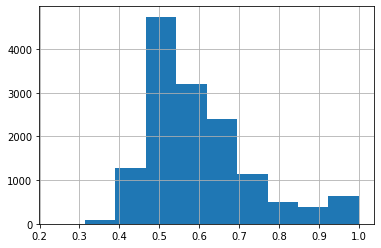

In [31]:
df['bs'].hist()

In [32]:
#bs - 以bs中位數填補空值
df['bs'] = df['bs'].fillna(df['bs'].quantile(0.5))
df

,a,b,bs,e,el,f,fi,g,j,k,l,lat,lon,m,p,r,s,t,tp,v
0,南和路151~180號,住宅大樓(11層含以上有電梯),0.5684,11003,有,九層/十五層,NaN,7.0,1,1,1,24.114653,120.667948,有,270916,61,49.83,房地(土地+建物)+車位,1350,3房2廳2衛有隔間
1,學府路146巷1~30號,住宅大樓(11層含以上有電梯),0.5580,11003,有,十五層/二十一層,NaN,25.0,1,1,0,24.129161,120.674391,有,170631,50,11.14,房地(土地+建物),190,1房0廳1衛有隔間
2,國光路365巷1~30號,華廈(10層含以下有電梯),0.7558,11003,有,"一層,騎樓,地下層/七層",NaN,29.0,3,1,0,24.120737,120.679649,有,153610,14,41.01,房地(土地+建物),630,NaN
3,復興路三段1~30號,住宅大樓(11層含以上有電梯),0.9526,11003,有,八層/十三層,NaN,40.0,1,1,0,24.128173,120.667634,有,188688,17,5.30,房地(土地+建物),100,1房0廳1衛有隔間
4,復興路一段271~300號,住宅大樓(11層含以上有電梯),0.6170,11003,有,六層/十三層,NaN,28.0,1,1,0,24.113345,120.652171,有,187031,58,10.69,房地(土地+建物),200,1房0廳1衛有隔間
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,崇倫街31~60號,華廈(10層含以下有電梯),0.8532,9910,無,四層/九層,0.0,2.0,2,1,0,24.128863,120.657291,有,178079,32,18.53,房地(土地+建物),330,2房2廳2衛有隔間
19984,崇倫街31~60號,華廈(10層含以下有電梯),0.8513,9910,無,九層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,254486,32,31.48,房地(土地+建物)+車位,801,3房2廳2衛有隔間
19985,崇倫街31~60號,華廈(10層含以下有電梯),0.8270,9910,無,四層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,228331,32,20.06,房地(土地+建物)+車位,458,2房2廳1衛有隔間
19986,崇倫街31~60號,華廈(10層含以下有電梯),0.8203,9910,無,六層/九層,0.0,2.0,2,1,1,24.128863,120.657291,有,245775,32,14.36,房地(土地+建物)+車位,353,1房2廳1衛有隔間


In [33]:
#欄位資料完整度
pd.DataFrame(1 - df.isnull().mean(), columns={'完整度'})

,完整度
a,1.000000
b,1.000000
bs,1.000000
e,1.000000
el,1.000000
f,0.999941
fi,0.987017
g,0.845264
j,1.000000
k,1.000000


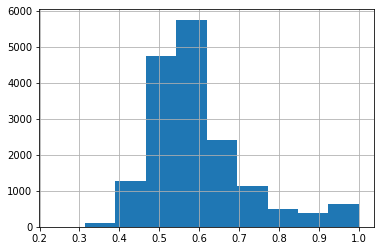

In [34]:
df['bs'].hist()

### f - 交易樓層/總樓層 -> 取出 tf - 建物總樓層 -> 捨去

In [35]:
#f - 交易樓層/總樓層 str -> sold floor (sf), total floor (tf)

#查看分布
pd.DataFrame(df['f'].value_counts(dropna=False)[:])

,f
全/四層,548
全/二層,531
五層/十二層,260
八層/十二層,254
五層/五層,253
...,...
"一層,二層/八層",1
"一層,見其他登記事項/十一層",1
十六層/二十七層,1
"一層,二層,騎樓/十七層",1


In [36]:
#f - 查看空值,只有2筆,丟掉
df = df.drop(df[df['f'].isnull()].index)

In [37]:
df[df['f'].isnull()]

,a,b,bs,e,el,f,fi,g,j,k,l,lat,lon,m,p,r,s,t,tp,v


In [38]:
def sold_floor(f): #sf
    return f.split('/')[0]
def total_floor(f): #tf
    return f.split('/')[1]

In [39]:
#f - 切開樓層
df['f'].apply(total_floor).value_counts(dropna=False).sort_values(ascending=False)

十五層     3138
十二層     2758
十四層     1894
五層       986
十三層      769
四層       727
七層       605
二十層      589
二層       534
十九層      503
十七層      454
八層       445
二十一層     437
十六層      433
二十二層     420
三十二層     409
十八層      331
十一層      329
二十四層     287
二十六層     236
九層       206
三層       203
十層       109
二十七層      54
一層        51
六層        28
四十二層       6
--         3
Name: f, dtype: int64

In [40]:
#f - 丟掉--樓層
df = df.drop(df.loc[df['f'].apply(total_floor) == '--'].index)
df['f'].apply(total_floor).value_counts(dropna=False).sort_values(ascending=False)

十五層     3138
十二層     2758
十四層     1894
五層       986
十三層      769
四層       727
七層       605
二十層      589
二層       534
十九層      503
十七層      454
八層       445
二十一層     437
十六層      433
二十二層     420
三十二層     409
十八層      331
十一層      329
二十四層     287
二十六層     236
九層       206
三層       203
十層       109
二十七層      54
一層        51
六層        28
四十二層       6
Name: f, dtype: int64

In [41]:
#中文樓層 -> int
def digit(c):
    pair = {
        '一':1, '二':2, '三':3, '四':4, '五':5, '六':6, '七':7, '八':7, '九':9, '十':10 
    }
    return pair[c]
def floor_to_int(f):
    f = f.replace('層', '')
    sum = 0
    if len(f) == 3:             #ex: 二十七
        sum+=digit(f[0])*10     #f[0] = 二
        sum+=digit(f[2])        #f[2] = 七
    if len(f) == 2:
        if not f[0] == '十':    #ex 二十
            sum+=digit(f[0])*10 #f[0] = 二
        else:                   #ex 十七
            sum+=10
            sum+=digit(f[1])
    if len(f) == 1:             #ex 七
        sum+=digit(f)           #f[0] = 七
    return sum

In [42]:
floor_to_int('六十三層')

63

In [43]:
df['f'].apply(total_floor).apply(floor_to_int).value_counts(dropna=False).sort_values(ascending=False)

15    3138
12    2758
14    1894
7     1050
5      986
17     785
13     769
4      727
20     589
2      534
19     503
21     437
16     433
22     420
32     409
11     329
24     287
26     236
9      206
3      203
10     109
27      54
1       51
6       28
42       6
Name: f, dtype: int64

### tf - 建物總樓層

In [44]:
#tf - 總樓層中文轉int
df['tf'] = df['f'].apply(total_floor).apply(floor_to_int)

In [45]:
#丟掉 f 欄位 / 老師建議不要預測某個樓層
df = df.drop(columns='f')

In [46]:
df.columns

Index(['a', 'b', 'bs', 'e', 'el', 'fi', 'g', 'j', 'k', 'l', 'lat', 'lon', 'm',
       'p', 'r', 's', 't', 'tp', 'v', 'tf'],
      dtype='object')

### e - 交易年月 - 最早98年1月 -> 轉換格式

In [47]:
df['e'].describe()

count    16941.000000
mean     10501.867422
std        268.005812
min       9801.000000
25%      10301.000000
50%      10504.000000
75%      10712.000000
max      11003.000000
Name: e, dtype: float64

In [48]:
#將98年1月設為0, 9801->1, 9802->2, 9803->3
def ym_convert(t):
    t = str(t)
    month = int(t[-2:])
    year = int(t[:-2])
    return (year-98)*12 + month

ym_convert('11004')

148

In [49]:
def y_convert(t):
    t = str(t)
    year = int(t[:-2])
    return year

y_convert('11004')

110

In [50]:
df['e_new'] = df['e'].apply(ym_convert)
df['year'] = df['e'].apply(y_convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16941 entries, 0 to 19987
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       16941 non-null  object 
 1   b       16941 non-null  object 
 2   bs      16941 non-null  float64
 3   e       16941 non-null  int64  
 4   el      16941 non-null  object 
 5   fi      16721 non-null  float64
 6   g       14323 non-null  float64
 7   j       16941 non-null  int64  
 8   k       16941 non-null  int64  
 9   l       16941 non-null  int64  
 10  lat     16941 non-null  float64
 11  lon     16941 non-null  float64
 12  m       16941 non-null  object 
 13  p       16941 non-null  int64  
 14  r       16941 non-null  int64  
 15  s       16941 non-null  object 
 16  t       16941 non-null  object 
 17  tp      16941 non-null  int64  
 18  v       16718 non-null  object 
 19  tf      16941 non-null  int64  
 20  e_new   16941 non-null  int64  
 21  year    16941 non-null  int64  
dty

In [51]:
#查看分布
pd.DataFrame(df['year'].value_counts(dropna=False)[:]).sort_index()

,year
98,1
99,16
100,147
101,1400
102,2567
103,2414
104,1509
105,1369
106,1664
107,1782


### s - 交易面積

In [52]:
#將面積中的逗號移除，並轉為float
df['s'] = df['s'].str.replace(',','').astype(float)

In [53]:
#查看分布
df['s'].describe()

count    16941.000000
mean        41.802454
std         17.366021
min          0.160000
25%         31.020000
50%         40.520000
75%         50.810000
max        364.460000
Name: s, dtype: float64

In [54]:
#剔除極值 - 捨去面積距離平均 2 個標準差以外的交易
df = df.drop(df.loc[abs(df['s'] - df['s'].mean())>2*df['s'].std()].index)

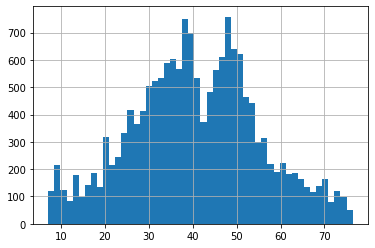

In [55]:
df['s'].hist(bins=50)

### p - 每坪單價

In [56]:
#看四分位數, 轉整數
df['p'].describe().apply("{0:.5f}".format)

count      16522.00000
mean      176651.93276
std        63595.25035
min            0.00000
25%       134234.75000
50%       165438.00000
75%       217926.25000
max      2007613.00000
Name: p, dtype: object

In [57]:
print('min %s'%df['p'].quantile(0))
print('%s %s'%(0.05, int(df['p'].quantile(0.05))))
for q in range(1,10):
    print('%s %s'%(q/10, int(df['p'].quantile(q/10))))
print('%s %s'%(0.95, int(df['p'].quantile(0.95))))
print('%s %s'%(0.99, int(df['p'].quantile(0.99))))
print('%s %s'%(0.999, int(df['p'].quantile(0.999))))
print('max %s'%df['p'].quantile(1))

min 0.0
0.05 95818
0.1 109507
0.2 128126
0.3 140053
0.4 152088
0.5 165438
0.6 183699
0.7 207918
0.8 226511
0.9 246399
0.95 268098
0.99 365005
0.999 571588
max 2007613.0


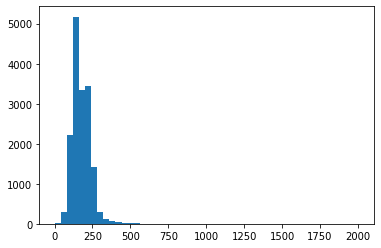

In [58]:
price = list(df['p']) 
for n in range(len(price)):
    price[n] = int(price[n]/1000) #每坪單價 : 千元
plt.hist(price, bins=50)
plt.show()

In [59]:
df['p'].describe()

count    1.652200e+04
mean     1.766519e+05
std      6.359525e+04
min      0.000000e+00
25%      1.342348e+05
50%      1.654380e+05
75%      2.179262e+05
max      2.007613e+06
Name: p, dtype: float64

In [60]:
#剔除極值 - 捨去每坪單價距離平均 2 個標準差以外的交易
df = df.drop(df.loc[abs(df['p'] - df['p'].mean())>2*df['p'].std()].index)

In [61]:
df['p'].describe()

count     16075.000000
mean     171933.996827
std       50502.774122
min       49593.000000
25%      133656.000000
50%      163990.000000
75%      214717.500000
max      303765.000000
Name: p, dtype: float64

In [62]:
print('min %s'%df['p'].quantile(0))
print('%s %s'%(0.05, int(df['p'].quantile(0.05))))
for q in range(1,10):
    print('%s %s'%(q/10, int(df['p'].quantile(q/10))))
print('%s %s'%(0.95, int(df['p'].quantile(0.95))))
print('%s %s'%(0.99, int(df['p'].quantile(0.99))))
print('%s %s'%(0.999, int(df['p'].quantile(0.999))))
print('max %s'%df['p'].quantile(1))

min 49593.0
0.05 96257
0.1 109571
0.2 127861
0.3 139451
0.4 151180
0.5 163990
0.6 180831
0.7 204200
0.8 223275
0.9 241009
0.95 256323
0.99 282413
0.999 301190
max 303765.0


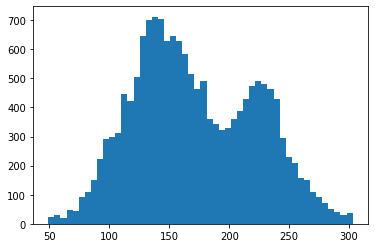

In [63]:
price = list(df['p']) 
for n in range(len(price)):
    price[n] = int(price[n]/1000) #每坪單價 : 千元
plt.hist(price, bins=50)
plt.show()

### lat, lon - KNN分類每坪單價級距

In [64]:
#df = df.drop(df.loc[df['lat'] == latlon_p['lat'].max()].index) #24.147867, 120.672562 西區, 丟掉

In [65]:
#取特定年度
for year in range(98, 110+1):
    print('%s %s'%(year, len(df.loc[(df['year'] == year)])))

98 1
99 15
100 136
101 1320
102 2435
103 2300
104 1409
105 1316
106 1587
107 1714
108 1984
109 1690
110 168


In [66]:
#從 101 年開始
df_101 = df.loc[(df['year'] == 101)]
df_102 = df.loc[(df['year'] == 102)]
df_103 = df.loc[(df['year'] == 103)]
df_104 = df.loc[(df['year'] == 104)]
df_105 = df.loc[(df['year'] == 105)]
df_106 = df.loc[(df['year'] == 106)]
df_107 = df.loc[(df['year'] == 107)]
df_108 = df.loc[(df['year'] == 108)]
df_109 = df.loc[(df['year'] == 109)]
df_110 = df.loc[(df['year'] == 110)]

In [67]:
#每年每坪單價趨勢
pd.DataFrame(pd.concat([df_101['p'].describe(), df_102['p'].describe(), df_103['p'].describe(), df_104['p'].describe(), df_105['p'].describe(), df_106['p'].describe(), df_107['p'].describe(), df_108['p'].describe(), df_109['p'].describe(), df_110['p'].describe()], keys=['101', '102', '103', '104', '105', '106', '107', '108', '109', '110'], axis=1)).astype(int)

,101,102,103,104,105,106,107,108,109,110
count,1320,2435,2300,1409,1316,1587,1714,1984,1690,168
mean,128972,152386,163881,162284,175483,181918,189504,195552,193224,198586
std,40858,48321,49095,43149,46198,49256,47498,45693,44926,42287
min,50906,51137,49964,51230,52453,49593,53352,55736,51316,68337
25%,97318,114213,129828,133607,135397,140882,148646,155552,160507,170720
50%,119742,140195,149695,156430,171638,177362,190582,205719,186152,199332
75%,157455,190411,195248,185045,214056,223006,229283,232188,226991,230329
max,300526,303220,303577,303504,294671,303260,303765,302869,301944,290922


In [68]:
#101年 quantile 0.1~0.9 = [87579, 94452, 99642, 105904, 119676, 135194, 151107, 164202, 179241]
quantiles = [int(df_101['p'].quantile(i/10)) for i in range(1,10)]
def price_level(p): #return 1~10
    if p < quantiles[0]: return 1
    if quantiles[0] <= p and p < quantiles[1]: return 2
    if quantiles[1] <= p and p < quantiles[2]: return 3
    if quantiles[2] <= p and p < quantiles[3]: return 4
    if quantiles[3] <= p and p < quantiles[4]: return 5
    if quantiles[4] <= p and p < quantiles[5]: return 6
    if quantiles[5] <= p and p < quantiles[6]: return 7
    if quantiles[6] <= p and p < quantiles[7]: return 8
    if quantiles[7] <= p and p < quantiles[8]: return 9
    if quantiles[8] <= p: return 10

price_level(135193)

7

In [69]:
df_101 = pd.concat([df_101, pd.DataFrame({'p_level':df_101['p'].apply(price_level)})], axis=1)

In [70]:
import statistics
for i in range(1,10):
  print((df_101['p'].quantile(i/10)))
  #print(statistics.mean((df_101['p'].quantile(i/10))))

87592.7
94460.4
99669.0
106047.20000000001
119742.0
135153.0
151112.7
164240.2
179304.6


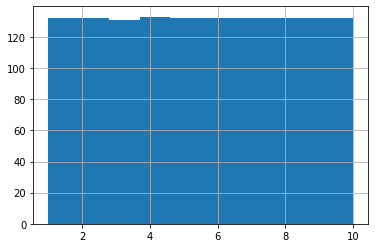

In [71]:
df_101['p_level'].hist()

In [72]:
latlon_p = pd.DataFrame(df_101[['lat', 'lon', 'p_level']])
latlon_p

,lat,lon,p_level
18216,24.115926,120.668072,6
18218,24.117520,120.661367,1
18221,24.117554,120.667888,4
18222,24.118528,120.658202,5
18223,24.130560,120.657258,8
...,...,...,...
19817,24.118478,120.663898,7
19818,24.118478,120.663898,8
19819,24.119859,120.651469,8
19820,24.118785,120.663730,8


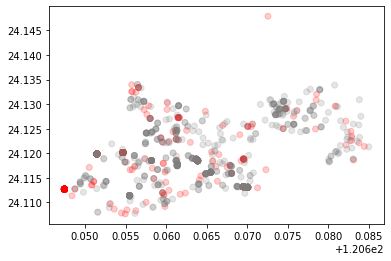

In [73]:
import matplotlib
#df_101 = df_101.drop(df_101.loc[df_101['lat'] == latlon_p['lat'].max()].index) #24.147867, 120.672562 西區, 丟掉
label = [1,2,3,4,5,6,7,8,9,10]
colors = ['grey','grey','grey', 'grey','red']
plt.scatter(latlon_p['lon'], latlon_p['lat'], c=latlon_p['p_level'], alpha=0.2, cmap=matplotlib.colors.ListedColormap(colors))

In [74]:
#全都是 101 年
df_101 = df_101.drop(columns=['year'])

In [75]:
X = df_101[['lon', 'lat']].values
y = df_101['p_level']

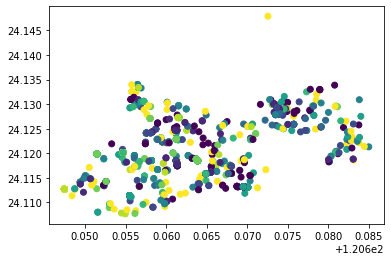

In [76]:
plt.scatter(X[:, 0], X[:, 1], c=y)

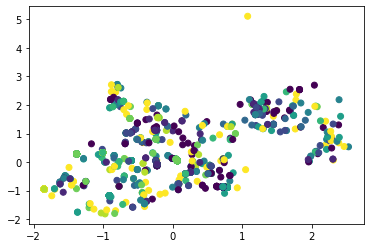

In [77]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0], X_new[:, 1], c=y)

In [78]:
X_new

array([[ 0.55535653, -0.39506751],
       [-0.22668918, -0.12032741],
       [ 0.53381318, -0.11451362],
       ...,
       [-1.38101741,  0.28265014],
       [ 0.04891746,  0.09755564],
       [ 0.04891746,  0.09755564]])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [80]:
pd.DataFrame({'Y_pred(預測)':y_pred, 'Y_test(實際)':y_test})

,Y_pred(預測),Y_test(實際)
19402,6,10
19263,3,3
19360,3,4
18675,7,9
19108,5,5
...,...,...
19813,8,7
19678,8,8
19147,1,10
18637,8,7


In [81]:
#查看某筆交易完整資料
i = 18484
pd.concat([df_101.loc[(df_101.index==i)], y.loc[(y.index==i)]], axis=1)

,a,b,bs,e,el,fi,g,j,k,l,lat,lon,m,p,r,s,t,tp,v,tf,e_new,p_level,p_level
18484,工學北路31~60號,透天厝,0.5684,10111,無,-1.0,7.0,5,2,2,24.118601,120.661348,有,181894,50,62.78,房地(土地+建物)+車位,1142,4房3廳3衛有隔間,4,47,10,10


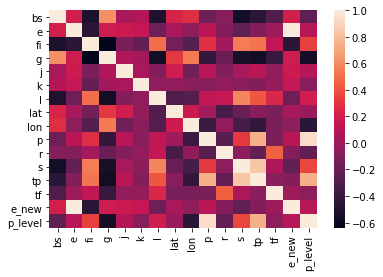

In [82]:
corr = df_101.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## 各變數關係係數

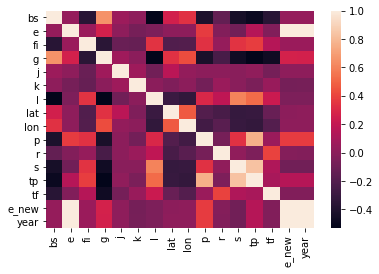

In [83]:
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 試跑

## 訓練

In [143]:
tmp  = df_101[['bs','e_new','g','j','k','l','lat','lon','s','tp','tf']]
#tmp  = df_101[['bs','e_new','g','j','k','l','lat','lon','s','tp','tf', 'p_level']] #加入 p_level
tmp

,bs,e_new,g,j,k,l,lat,lon,s,tp,tf
18216,0.6727,48,18.0,1,1,0,24.115926,120.668072,35.78,465,22
18218,0.5683,48,17.0,2,3,1,24.117520,120.661367,46.65,400,17
18221,0.6200,48,20.0,1,2,0,24.117554,120.667888,44.23,455,16
18222,0.5927,48,6.0,1,2,0,24.118528,120.658202,39.17,450,32
18223,0.6133,48,8.0,1,1,0,24.130560,120.657258,20.29,330,14
...,...,...,...,...,...,...,...,...,...,...,...
19817,0.4934,37,2.0,1,1,1,24.118478,120.663898,57.64,830,15
19818,0.4934,37,2.0,1,1,1,24.118478,120.663898,57.64,860,15
19819,0.4486,37,2.0,1,1,2,24.119859,120.651469,75.07,1055,15
19820,0.5013,37,2.0,1,1,1,24.118785,120.663730,65.79,968,15


In [144]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 18216 to 19821
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bs      1320 non-null   float64
 1   e_new   1320 non-null   int64  
 2   g       1013 non-null   float64
 3   j       1320 non-null   int64  
 4   k       1320 non-null   int64  
 5   l       1320 non-null   int64  
 6   lat     1320 non-null   float64
 7   lon     1320 non-null   float64
 8   s       1320 non-null   float64
 9   tp      1320 non-null   int64  
 10  tf      1320 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 123.8 KB


In [145]:
#欄位資料完整度
pd.DataFrame(1 - tmp.isnull().mean(), columns={'完整度'})

,完整度
bs,1.000000
e_new,1.000000
g,0.767424
j,1.000000
k,1.000000
l,1.000000
lat,1.000000
lon,1.000000
s,1.000000
tp,1.000000


In [146]:
tmp['g'].describe()

count    1013.000000
mean       11.489635
std        10.082032
min         1.000000
25%         2.000000
50%        13.000000
75%        18.000000
max        49.000000
Name: g, dtype: float64

In [147]:
tmp['g'] = tmp['g'].fillna(tmp['g'].quantile(0.5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
tmp['g'].describe()

count    1320.000000
mean       11.840909
std         8.854163
min         1.000000
25%         2.000000
50%        13.000000
75%        17.000000
max        49.000000
Name: g, dtype: float64

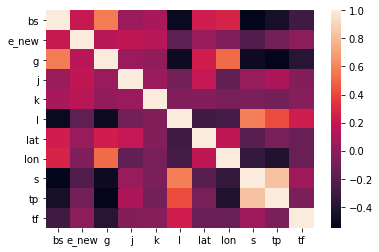

In [149]:
corr = tmp.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [150]:
X = tmp.drop(columns=['tp'])
Y = tmp['tp']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [152]:
X_train.shape, Y_train.shape

((1056, 10), (1056,))

In [153]:
X_test.shape, Y_test.shape

((264, 10), (264,))

In [154]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
 
#KNN
from sklearn.neighbors import KNeighborsRegressor

In [155]:
#model = linear_model.LinearRegression()
model = KNeighborsRegressor(n_neighbors=10)

In [156]:
model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=10)

In [157]:
Y_pred = model.predict(X_test)

In [158]:
# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)
# print('Mean squared error (MSE): %.2f'
#       % mean_squared_error(Y_test, Y_pred))
# print('Coefficient of determination (R^2): %.2f'
#       % r2_score(Y_test, Y_pred))

## 結果

In [159]:
r2_score(Y_test, Y_pred)

0.8480190047772054

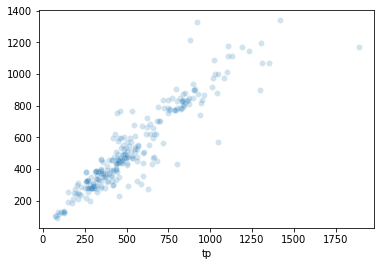

In [160]:
import seaborn as sns
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.2)

In [161]:
yt = list(Y_test)[:]
yp = list(Y_pred)[:]

In [162]:
pd.DataFrame({'Y_pred(預測)':yp, 'Y_test(實際)':yt, 'Y_test_index':Y_test.index})[:10]

,Y_pred(預測),Y_test(實際),Y_test_index
0,103.2,70,18652
1,276.7,290,19373
2,404.1,436,19047
3,271.6,630,18302
4,848.0,895,19689
5,325.4,270,18959
6,721.2,625,18225
7,374.8,380,18743
8,834.5,720,18788
9,478.1,510,19344


In [163]:
#查看某筆交易完整資料
i = 19776
pd.concat([X.loc[(X.index==i)], Y.loc[(Y.index==i)]], axis=1)

,bs,e_new,g,j,k,l,lat,lon,s,tf,tp
19776,0.5684,39,1.0,2,1,1,24.127078,120.658033,57.21,4,880


In [164]:
# import numpy as np
# model.predict(
#     pd.DataFrame(
#         columns=['bs', 'e_new', 'g', 'j', 'k', 'l', 'lat', 'lon', 's', 'tf'],
#         data=np.array([100,0,10.0,1,1,0,999,999,100,12]).reshape(1,10)
#         ))

# MLflow

In [106]:
# !pip install mlflow --quiet
# !pip install pyngrok --quiet

In [107]:
# import mlflow

# with mlflow.start_run(run_name="MLflow on Colab"):
#   mlflow.log_metric("m1", 2.0)
#   mlflow.log_param("p1", "mlflow-colab")

# # run tracking UI in the background
# get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background

In [108]:
# # create remote tunnel using ngrok.com to allow local port access
# # borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

# from pyngrok import ngrok

# # Terminate open tunnels if exist
# ngrok.kill()

# # Setting the authtoken (optional)
# # Get your authtoken from https://dashboard.ngrok.com/auth
# NGROK_AUTH_TOKEN = "1reVNsmSUAiyOS8SEI5Mky51krN_87posjXdYo76KrCdPqiXb"
# ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# # Open an HTTPs tunnel on port 5000 for http://localhost:5000
# ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
# print("MLflow Tracking UI:", ngrok_tunnel.public_url)

In [109]:
# import requests
# r = requests.get('https://fdd466379293.ngrok.io/')
# r.text

# Jupyter

In [110]:
# !pip install jupyter --quiet
# !pip install pyngrok --quiet

In [111]:
# cfg = '''authtoken: 1reVNsmSUAiyOS8SEI5Mky51krN_87posjXdYo76KrCdPqiXb
# tunnels:
#   first:
#     proto: http
#     addr: 5000
#   second:
#     proto: http
#     addr: 8000'''

In [112]:
# import os
# os.path.expanduser('~')

In [113]:
# with open('ngrok.yml', 'w') as f:
#     f.write(cfg)

In [114]:
# !ls /root/.ngrok2

In [115]:
# ngrok.kill()
# NGROK_AUTH_TOKEN = "1reVNsmSUAiyOS8SEI5Mky51krN_87posjXdYo76KrCdPqiXb"
# ngrok.set_auth_token(NGROK_AUTH_TOKEN)
# ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
# print("jupyter", ngrok_tunnel.public_url)
# cmd = 'jupyter notebook --no-browser --ip 0.0.0.0 --port 5000 --allow-root'
# get_ipython().system_raw(cmd)

In [116]:
# with open('ngrok.yml', 'r') as f:
#     txt = f.read()
#     print(txt)

In [117]:
# from pyngrok import conf, ngrok

# conf.get_default().config_path = 'ngrok.yml'

In [118]:
# ngrok_tunnel = ngrok.connect()

In [119]:
# ngrok.kill()

In [120]:
# tunnel = ngrok.get_tunnels()
# tunnel